In [125]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [126]:
#load is used to load datasets of the sklearn.datasets 
digits = load_digits()

In [127]:
#"scale" function is an inbuilt function in the Python sklearn.preprocessing library which is used to change the image size by scaling each pixel value by given columns and rows.
data = scale(digits.data)

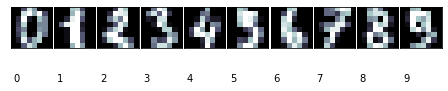

In [128]:
"""
This functio is defined to visualize some of the 10 clusters of the dataset

"""
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

n_digits: 10, 	 n_samples 1347, 	 n_features 64


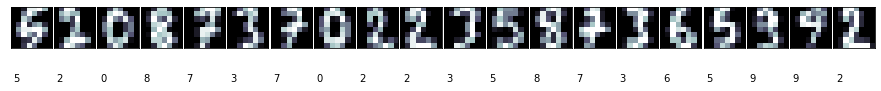

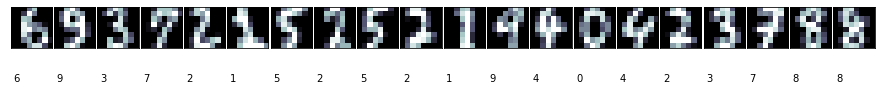

In [129]:
#returns the shape of teh first image in the dataset 
number_of_instances=digits.images.shape[0]
#Splitting the training and testing dataset (defining the target variable)
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images.reshape(number_of_instances,64),test_size=0.25, random_state=42)
#Returns the number of samples and features in the training set 
n_samples, n_features = X_train.shape
#returns the length of the labels (y_train) of only unique values
n_digits = len(np.unique(y_train))
labels = y_train

# Reshape images back
images_train=images_train.reshape(images_train.shape[0],8,8)
images_test=images_test.reshape(images_test.shape[0],8,8)

#visualization of the different digits 
print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

The explained_variance_ratio_ attribute of the PCA object contains the fraction of the total variance in the original dataset that is explained by each principal component.

When we apply PCA to a high-dimensional dataset, the algorithm finds a new set of orthogonal directions (the principal components) that represent the data in a lower-dimensional space. The first principal component captures the largest amount of variation in the data, the second principal component captures the second-largest amount of variation, and so on.

The explained variance ratio for each principal component is a measure of how much of the total variation in the dataset can be explained by that component. For example, if the explained variance ratio for the first principal component is 0.6, this means that the first principal component captures 60% of the total variation in the dataset.

The sum of the explained variance ratios for all principal components is equal to 1, since they collectively account for all of the variation in the dataset.

The explained variance ratio is a useful metric for evaluating the performance of PCA because it allows us to determine how much information is preserved by reducing the dimensionality of the dataset. We typically want to retain as much of the original variation as possible while reducing the dimensionality, so a high explained variance ratio is desirable.

In [130]:
from sklearn.metrics import adjusted_rand_score


In [131]:
X_train=X_train
y_train=y_train

In [132]:
best_Dimention=X_train.shape[1]
for n in range(X_train.shape[1], 0, -1):
  pca = PCA(n_components=n).fit(X_train)
  reduced_X_train = pca.transform(X_train)
  clustering_features = KMeans(init='k-means++', n_clusters=10, random_state=42)
#the "fit()" function implements a fit method to learn from data
  clustering_features.fit(reduced_X_train)
  # Calculate explained variance ratio
  explained_var_ratio = pca.explained_variance_ratio_
  # Calculate adjusted Rand index
  labels_pred = clustering_features.labels_
  ari = adjusted_rand_score(y_train, labels_pred)
  r=0
# Print explained variance ratio for each principal component
  for i, ratio in enumerate(explained_var_ratio):
    r+=ratio
  if n<best_Dimention and r>=0.9:
    best_Dimention=n
  print("PCA with {} dimentions the total explained variance ratio: {:.5f}, and the adjusted_rand_score For The Clustring Algorithm  is {:.5f} ".format(n, r,ari))



PCA with 64 dimentions the total explained variance ratio: 1.00000, and the adjusted_rand_score For The Clustring Algorithm  is 0.54543 
PCA with 63 dimentions the total explained variance ratio: 1.00000, and the adjusted_rand_score For The Clustring Algorithm  is 0.54543 
PCA with 62 dimentions the total explained variance ratio: 1.00000, and the adjusted_rand_score For The Clustring Algorithm  is 0.54543 
PCA with 61 dimentions the total explained variance ratio: 1.00000, and the adjusted_rand_score For The Clustring Algorithm  is 0.54543 
PCA with 60 dimentions the total explained variance ratio: 0.99923, and the adjusted_rand_score For The Clustring Algorithm  is 0.48375 
PCA with 59 dimentions the total explained variance ratio: 0.99824, and the adjusted_rand_score For The Clustring Algorithm  is 0.41467 
PCA with 58 dimentions the total explained variance ratio: 0.99705, and the adjusted_rand_score For The Clustring Algorithm  is 0.51666 
PCA with 57 dimentions the total explaine

In [133]:
print("The Best Dimention based on the explained variance ratio >=0.9 is :",best_Dimention)


The Best Dimention based on the explained variance ratio >=0.9 is : 31
